In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

In [6]:
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', None)

In [8]:
# Выгружаем данные
df = pd.read_excel('task2.xlsx')

In [9]:
# Фильтруем данные на присутствие нулевых значений
filter_price = df['objPriceAvg'].notna()

In [10]:
# Считаем среднюю цену на объект по регионам
avg_price = df.loc[filter_price].groupby('region')['objPriceAvg'].mean()
df.columns.tolist()

['Unnamed: 0',
 'objPriceAvg',
 'region',
 'objFloorCnt',
 'objFlatCnt',
 'objSquareLiving',
 'objElemParkingCnt']

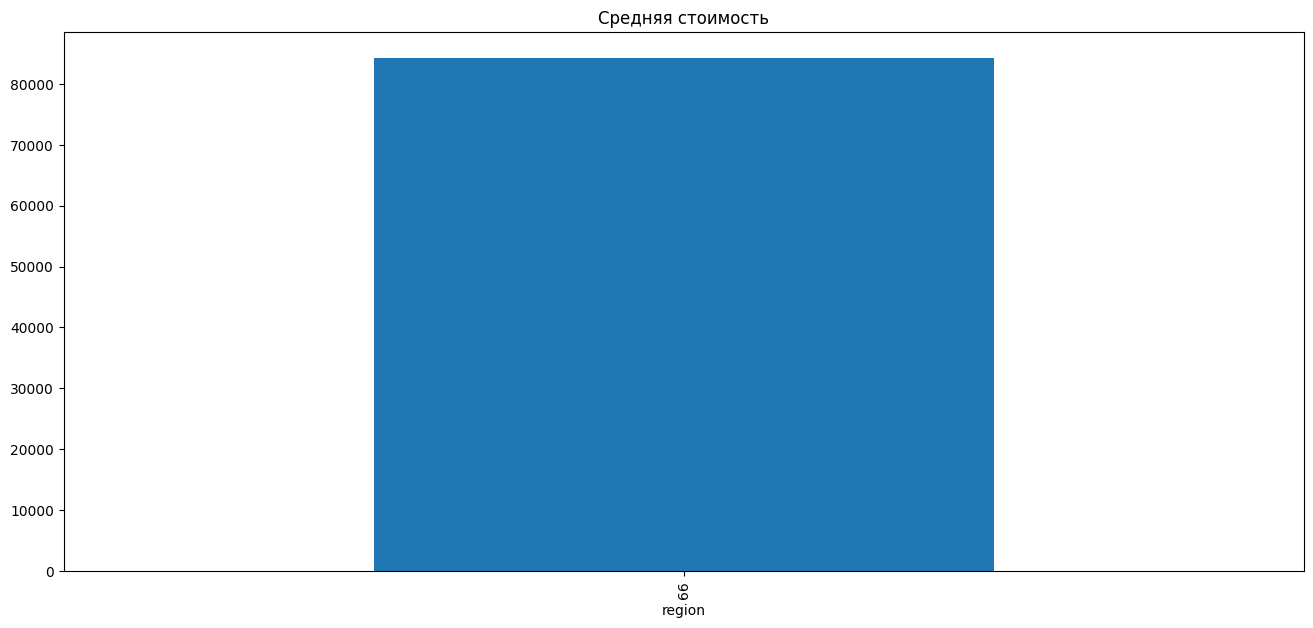

In [11]:
# Столбчатая диаграмма средней стоимости по регионам 
rcParams['figure.figsize'] = 16,7
avg_price.sort_values(ascending=True).plot(kind='bar')
plt.title("Средняя стоимость")
plt.show()

In [ ]:
avg_price.sort_values(ascending=True).tail()

region
89     82664.142857
25     85348.173913
47     86608.818182
78    114524.752475
77    229392.583333
Name: objPriceAvg, dtype: float64

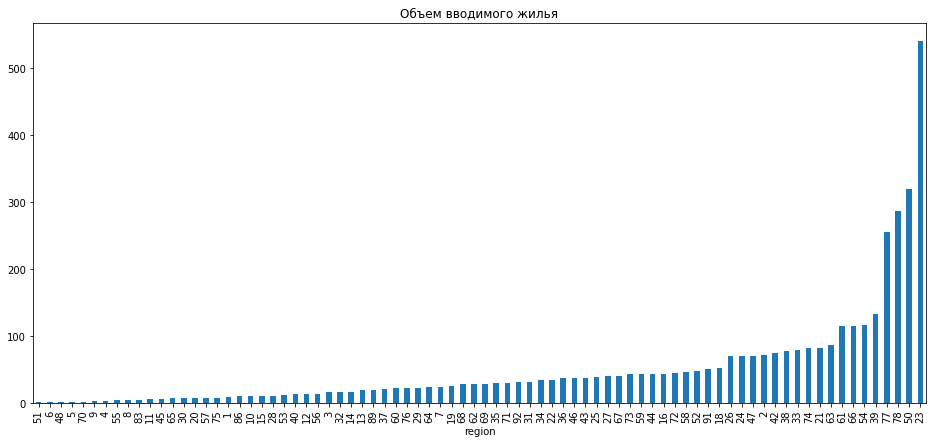

In [ ]:
# Столбчатая диаграмма объемов вводимого жилья по регионам
volume_obj = df.groupby('region')['region'].count()
volume_obj.sort_values(ascending=True).plot(kind='bar')
plt.title("Объем вводимого жилья")
plt.show()

In [ ]:
volume_obj.sort_values(ascending=True).tail()

region
39    133
77    256
78    287
50    320
23    541
Name: region, dtype: int64

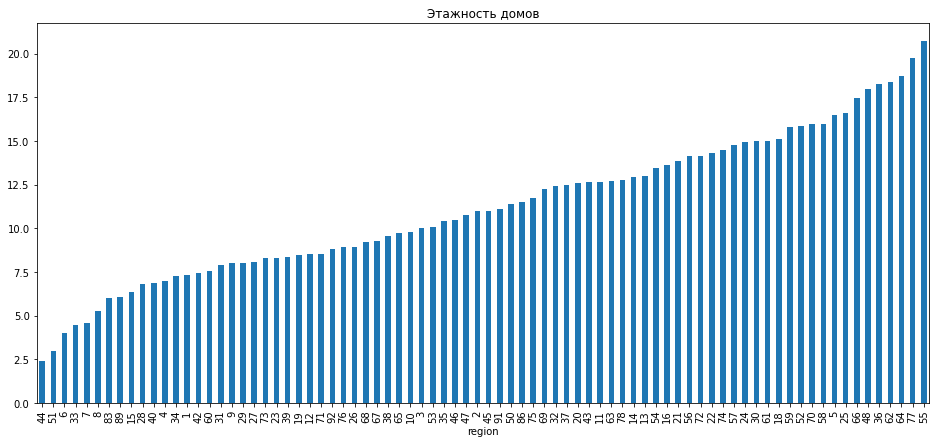

In [ ]:
# Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
## Этажность домов
filter_floor = df['objFloorCnt'].notna()
avg_floor = df.loc[filter_floor].groupby('region')['objFloorCnt'].mean()
avg_floor.sort_values(ascending=True).plot(kind='bar')
plt.title("Этажность домов")
plt.show()

In [ ]:
avg_floor.sort_values(ascending=True).tail()

region
36    18.257143
62    18.357143
64    18.708333
77    19.773810
55    20.750000
Name: objFloorCnt, dtype: float64

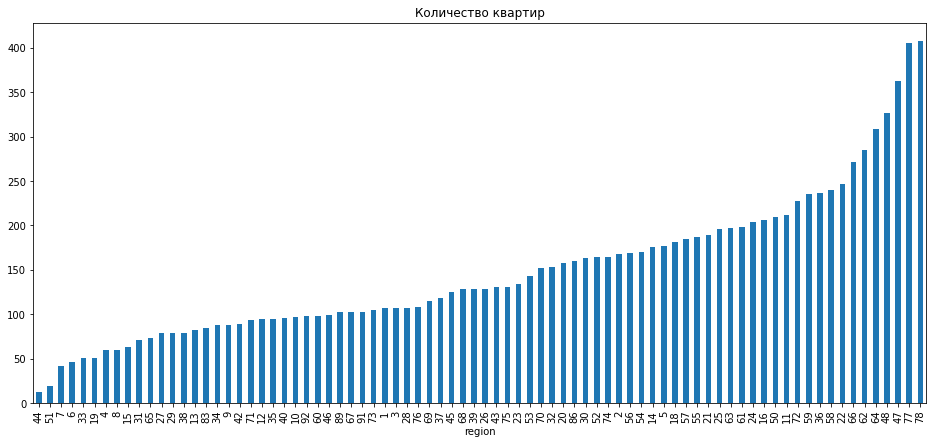

In [ ]:
## Количество квартир
filter_flat = df['objFlatCnt'].notna()
avg_flat = df.loc[filter_flat].groupby('region')['objFlatCnt'].mean()
avg_flat.sort_values(ascending=True).plot(kind='bar')
plt.title("Количество квартир")
plt.show()

In [ ]:
avg_flat.sort_values(ascending=True).tail()

region
64    308.291667
48    326.000000
47    362.271429
77    404.955752
78    407.898618
Name: objFlatCnt, dtype: float64

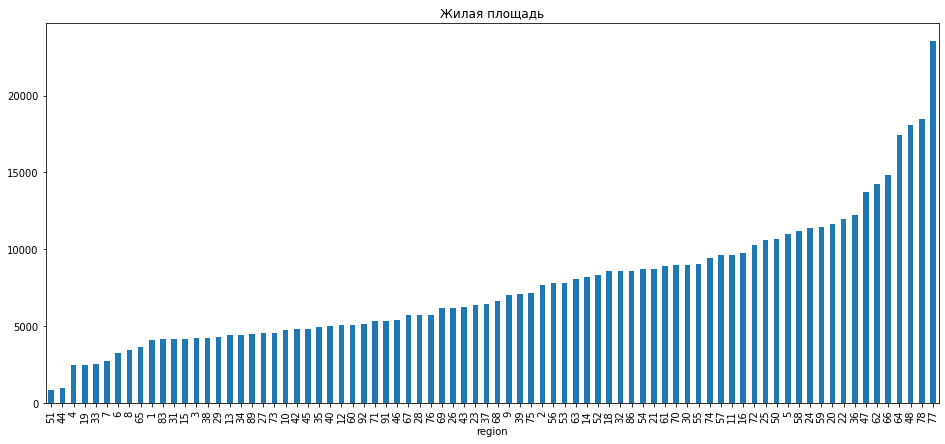

In [ ]:
## Жилая площадь
filter_living = df['objSquareLiving'].notna()
avg_living = df.loc[filter_living].groupby('region')['objSquareLiving'].mean()
avg_living.sort_values(ascending=True).plot(kind='bar')
plt.title("Жилая площадь")
plt.show()

In [ ]:
avg_living.sort_values(ascending=True).tail()

region
66    14818.099787
64    17406.818333
48    18078.570000
78    18481.442074
77    23567.902743
Name: objSquareLiving, dtype: float64

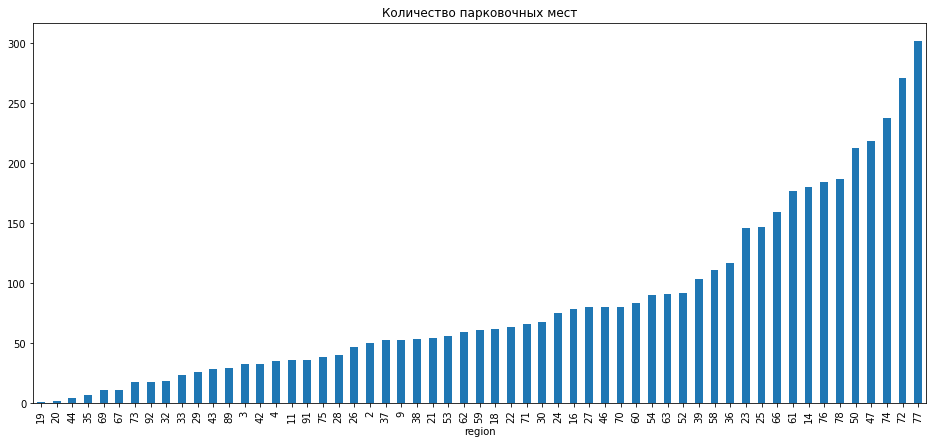

In [ ]:
## Количество парковочных мест
filter_parking = df['objElemParkingCnt'].notna()
avg_parking = df.loc[filter_parking].groupby('region')['objElemParkingCnt'].mean()
avg_parking.sort_values(ascending=True).plot(kind='bar')
plt.title("Количество парковочных мест")
plt.show()

In [ ]:
avg_parking.sort_values(ascending=True).tail()

region
50    212.592593
47    219.000000
74    237.500000
72    271.125000
77    302.311321
Name: objElemParkingCnt, dtype: float64

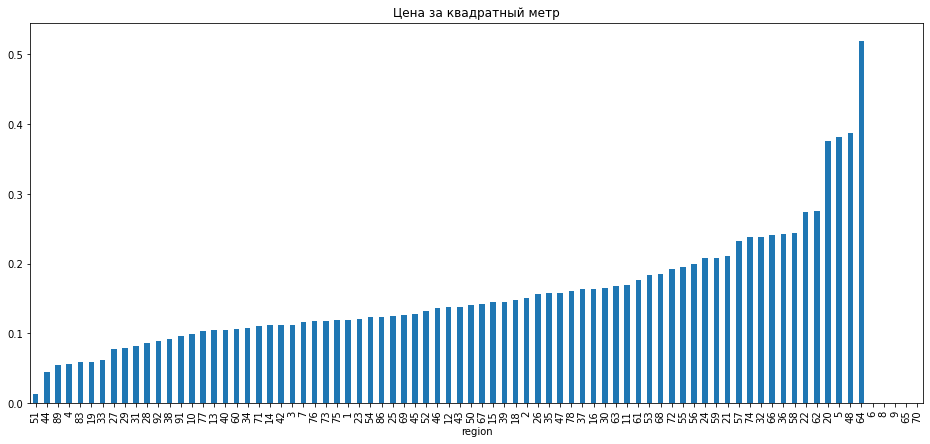

In [ ]:
## Цена за квадратный метр
avg_price_for_square = avg_living / avg_price
avg_price_for_square.sort_values(ascending=True).plot(kind='bar')
plt.title("Цена за квадратный метр")
plt.show()

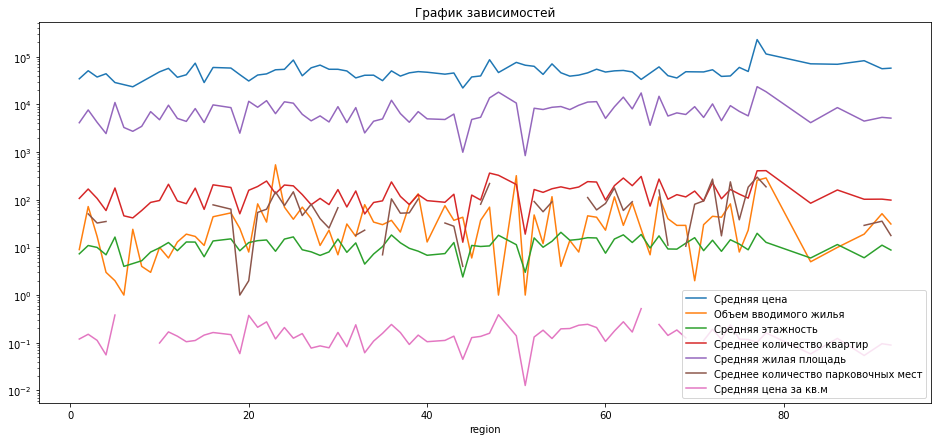

In [ ]:
## Визуализировать разброс, связь и распределение этих показателей по регионам

avg_price.plot(logy=True)
volume_obj.plot()
avg_floor.plot()
avg_flat.plot()
avg_living.plot()
avg_parking.plot()
avg_price_for_square.plot()
plt.title('График зависимостей')
plt.legend(["Средняя цена", "Объем вводимого жилья", "Средняя этажность", "Среднее количество квартир", "Средняя жилая площадь", "Среднее количество парковочных мест", "Средняя цена за кв.м"])

plt.show()